<a href="https://colab.research.google.com/github/zackyalgiffari/Jiko-JKT48/blob/main/Jiko_JKT48_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import library
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Import dataset
file_path = 'https://raw.githubusercontent.com/zackyalgiffari/Jiko-JKT48/main/Jiko%20member%20dataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
#Menghilangkan kolom unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,nama_lengkap,nama_panggilan,tempat_tanggal_lahir,generasi,salam_perkenalan
0,Adzana Shaliha Alifyaa,"Ashel, Acel","Jakarta, Indonesia, 8 Januari 2005 (18 tahun)",9,Aku datang bagaikan embun pagi yang menyejukka...
1,Amanda Puspita Sukma Mulyadewi,"Amanda, Manda, Mandut","Malang, Jawa Timur, Indonesia, 17 Desember 200...",10,Brum brum! Melaju cepat bagai motor 1000cc! Ak...
2,Angelina Christy,"Christy, Angel, Kitoy, Toya","Jakarta, Indonesia, 5 Desember 2005 (18 tahun)",7,"Peduli dan berbaik hati, siapakah dia? Chris....."
3,Aurellia,"Lia, Oreli, Coach Lia","Jakarta, Indonesia, 29 Oktober 2002 (21 tahun)",10,Si social butterfly yang energik dan periang! ...
4,Azizi Shafaa Asadel,"Zee, Azizi, Zizoy, Zoya","Jakarta, Indonesia, 16 Mei 2004 (19 tahun)",7,Si gadis tomboi yang semangatnya meletup-letup...


In [ ]:
# Preprocessing data
# Mengubah kolom nama_lengkap menjadi lowercase
df['nama_lengkap'] = df['nama_lengkap'].apply(lambda x: x.lower())
# Mengubah kolom nama_panggilan menjadi lowercase
df['nama_panggilan'] = df['nama_panggilan'].apply(lambda x: x.lower().replace(',', ''))

df['jiko'] = df['salam_perkenalan'].apply(lambda x: x.lower())  # Merubah teks menjadi lowercase
df['jiko'] = df['jiko'].str.replace('[^\w\s]', '')  # Menghapus karakter khusus

df = df.drop(columns=['salam_perkenalan'])
df.head()

<ipython-input-10-68a00771d5e0>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['jiko'] = df['jiko'].str.replace('[^\w\s]', '')  # Menghapus karakter khusus


,nama_lengkap,nama_panggilan,tempat_tanggal_lahir,generasi,jiko
0,adzana shaliha alifyaa,ashel acel,"Jakarta, Indonesia, 8 Januari 2005 (18 tahun)",9,aku datang bagaikan embun pagi yang menyejukka...
1,amanda puspita sukma mulyadewi,amanda manda mandut,"Malang, Jawa Timur, Indonesia, 17 Desember 200...",10,brum brum melaju cepat bagai motor 1000cc aku ...
2,angelina christy,christy angel kitoy toya,"Jakarta, Indonesia, 5 Desember 2005 (18 tahun)",7,peduli dan berbaik hati siapakah dia chris ty ...
3,aurellia,lia oreli coach lia,"Jakarta, Indonesia, 29 Oktober 2002 (21 tahun)",10,si social butterfly yang energik dan periang h...
4,azizi shafaa asadel,zee azizi zizoy zoya,"Jakarta, Indonesia, 16 Mei 2004 (19 tahun)",7,si gadis tomboi yang semangatnya meletupletup ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nama_lengkap          59 non-null     object
 1   nama_panggilan        59 non-null     object
 2   tempat_tanggal_lahir  59 non-null     object
 3   generasi              59 non-null     object
 4   jiko                  59 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB


In [ ]:
# Menggabungkan kata-kata dari kolom nama_panggilan dan nama_lengkap
stop_words_panggilan = ' '.join(df['nama_panggilan'].astype(str).tolist()).lower()
stop_words_lengkap = ' '.join(df['nama_lengkap'].astype(str).tolist()).lower()

# Daftar stop words
custom_stop_words = ['aku', 'halo', 'yang', 'akan', 'semuanya', 'hai', 'dengan', 'si', 'seperti', 'selalu','untuk','terus']
custom_stop_words.extend(stop_words_panggilan.split())
custom_stop_words.extend(stop_words_lengkap.split())
custom_stop_words.extend(set(stopwords.words('english')))
custom_stop_words = list(set(custom_stop_words))  # Hapus duplikasi

In [ ]:
# Menampilkan daftar stop words
print("Daftar Stop Words:")
print(custom_stop_words)


Daftar Stop Words:
['alexandra', "that'll", 'me', "you'd", 'shafaa', 'will', 'lenathea', 'mewengkang', 'shasa', 'nachia', 'cornelia', "should've", 'tanujaya', 'herself', "won't", 'eli', 'they', 'shania', 'then', 'm', 'ceu', 'fritzy', 'chandra', 'just', 'each', 'levi', 'kathrina', 'coach', 'oline', 'aurhel', 'where', 'manuel', 'that', 'up', 'tjhai', 'y', 'other', 'between', 'some', 'naila', 'semuanya', 'itself', 'jambul', 'shabilqis', 'moreen', 'these', 'callista', 'napitupulu', 'who', 'been', 'with', 'shouldn', 'mpen', 'azkiya', 'further', 'aku', 'wouldn', 'while', 'acel', 'chapman', 'septiani', 'for', 'mustn', 'oreli', 'very', 'nurdana', 'being', 'seperti', 'regina', 'nixie', 'lapian', 'michie', 'she', 'flora', '(????????????)', 'below', 'the', "she's", 'll', 'again', 'muthe', 'dedel', 'davina', "you've", 'fatihah', 'doesn', 'against', 'you', 'olla', 'shaliha', 'abigail', 'no', 'sukma', 'lyn', 'such', 'alveria', 'does', 'grace', 'dena', 'once', "needn't", 'only', 'off', 'nina', 'there

In [ ]:
# Membuat daftar kata unik
unique_words = set()

# Mengumpulkan kata-kata unik dari setiap salam perkenalan
for salam in df['jiko']:
    # Hapus kata-kata pendek
    salam = ' '.join([word for word in salam.split() if len(word) > 2])
    # Hapus stop words
    salam = ' '.join([word for word in salam.split() if word not in custom_stop_words])
    # Hapus kata-kata dari nama panggilan dan nama lengkap
    salam = ' '.join([word for word in salam.split() if word not in stop_words_panggilan.split()])
    salam = ' '.join([word for word in salam.split() if word not in stop_words_lengkap.split()])
    words = salam.split()
    unique_words.update(words)

In [ ]:
# Mengurutkan kata-kata unik secara alfabetis
sorted_unique_words = sorted(unique_words)

# Menampilkan daftar kata-kata unik secara alfabetis
print("Daftar Kata Unik (Alfabetis):")
for word in sorted_unique_words:
    print(word)

Daftar Kata Unik (Alfabetis):
1000cc
abrakadabra
ada
air
always
aprikot
araaralie
ayo
baby
bagai
bagaikan
bahagia
bakkyun
banyak
berarti
berbaik
berbungabunga
bercerita
bereaksi
berimajinasi
berlarilari
bersamaku
bersinar
beruang
berusaha
beyond
bicara
bikin
bintang
bonjour
boom
bright
brum
bubble
bukan
bulan
bunga
butterfly
call
cantik
cepat
ceria
chance
checkmate
chris
cie
cinta
coklat
dalam
dan
datang
denganku
dia
diam
dinantinantikan
dunia
duniaku
embun
energi
energik
energimu
everyone
foto
full
gadis
gas
girl
graceful
gulali
gum
gummy
hadir
haloha
hamster
hanya
hari
hariharimu
harimu
harinya
hati
hatimu
hello
hola
horas
ikut
imut
indahmu
infinity
ingatanmu
ingin
ini
itu
itulah
jalani
jelas
jelita
jika
kalau
kalem
kalian
kalium
kamu
kapas
karamelku
katakan
keajaiban
keajaibanku
kebahagiaan
kegembiraanku
kehangatan
kehebatanku
kejutan
kekuatan
kelincahanku
kelinci
kembang
kembanggaanmu
kesegaran
kokoro
koleris
konnichiwa
kucing
kunangkunang
lagi
laut
lavender
lewat
lincah
madu
malam

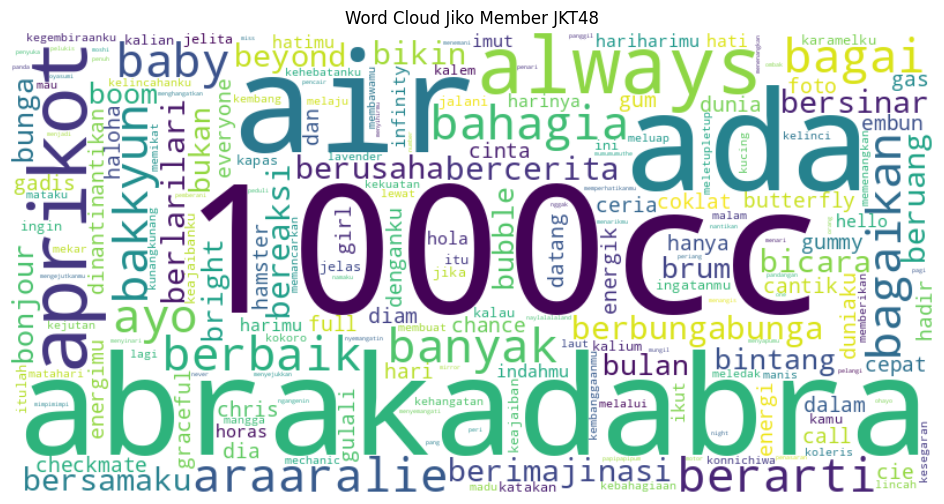

In [ ]:
# Menggabungkan kata-kata unik menjadi satu string
text = ' '.join(sorted_unique_words)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Show word cloud Visualization
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Jiko Member JKT48')
plt.show()